In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla

from helper_functions import *

In [2]:
import sys

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !git clone https://github.com/cs357/demos-cs357.git
    !mv demos-cs357/Group-Activities/extra_files/ .
    sys.path.insert(1, 'extra_files/')

<div class="alert alert-info">

<h1>Example 1: Numerical model for vibration in bridges</h1>
    
  <img src="eigenvalue_vibrating_bridge_tacoma.jpg"
  style="width: 50%; float:right;margin-left:4em; clear:both;">
  <p>
      <strong>Eigenvalues and eigenvectors</strong> are important in Civil Engineering.
    All structures, from buildings to bridges, have <em>natural frequencies</em> of vibration.
    If external forces, like wind or earthquakes, provide energy to one of these natural frequencies at a
    rate faster than that with which damping dissipates it, vibrations with large amplitudes can occur. </p>
   <p> This is a phenomenon called <em>resonance</em> and it can be modeled as an eigenvalue problem.
    For some things (like guitar strings), that is desired.
    For some others (such as a <a href="https://youtu.be/ACKMPD6MySs" target="_blank">tall building</a>,
    or an <a href="https://en.wikipedia.org/wiki/Lockheed_L-188_Electra#Operational_history" target="_blank">airplane</a>,
    or a bridge), this is less desirable.</p>   
  <p>
    The collapse of the
    <a href="https://en.wikipedia.org/wiki/Tacoma_Narrows_Bridge_(1940)" target="_blank">Tacoma Narrows Bridge</a>,
    pictured at the right, is a striking example of resonance.
    (It is actually a bit more complicated than that and is an example of a phenomenon called
    <a href="https://en.wikipedia.org/wiki/Aeroelasticity#Flutter" target="_blank">aeroelastic flutter</a>).
    Fortunately, the resulting math is
    fairly similar when modeled as resonance. To illustrate the problem, Wikipedia has some
    <a href="https://commons.wikimedia.org/wiki/File:Tacoma_Narrows_Bridge_destruction.ogg" target="_blank">footage</a>
    of the oscillations and the ensuing collapse and, if you're into that type of thing, a
    <a href="https://commons.wikimedia.org/wiki/File:Tacoma_Bridge_Animation.ogv" target="_blank">numerical simulation</a>.
  </p>
</div>


## 1.1) Simple model: unsupported bridge (no pillars)

The unsupported bridge model consists of $N$ small masses $m_i$ connected by springs, as illustrated below:

<img src="Bridge_Undeformed.png" width=900></img>

We will assume each mass $m_i$ will experience only transverse (vertical) displacements $y_i$ (i.e., we will neglect any longitudinal displacements). For our model, we will use `N = 200`. Consider the diagram below, where we look at a subset of masses, to help us writing the equations of motion for each mass $m_i$:

<img src="Bridge_Deformed.png" width=600></img>



Recall from your physics class that a spring force is defined as $F = -k \Delta L$, where $k$ is the spring stiffness (modeling the stiffness of the bridge) and $\Delta L$ is the spring change in length when subject to the force $F$. Since here we are neglecting the longitudinal changes $\Delta x$, we can write the following equation for the equation of motion:

$$ m y''_i  -k(y_{i+1} - y_i) + k(y_i - y_{i-1}) = 0 $$

where we are assuming that all masses have the same value ($m_i = m$ for all $i$). We can re-arrange the equation above to obtain:

$$  \frac{m}{k} y''_i  + (2\,y_i - y_{i+1} - y_{i-1}) = 0 $$

We assume that the solution for this ODE (this is the harmonic oscillator that we introduced in the last group activity!) is given by:

$$ y(t) = A \cos(wt) $$

which gives $y''(t) = - w^2 A \cos(wt) = -w^2 y(t)$. When we substitute this into the equation of motion, we get:

$$ - \frac{m}{k} w^2 y_i  + (2\,y_i - y_{i+1} - y_{i-1}) = 0 $$

We will explore more this equation. We need to solve this for all masses! You should recognize now that this system of linear equations can be written in a matrix form. We will define the variable

$$\lambda = \frac{m}{k} w^2$$

and write the system of linear equations:

  <p>
    $\lambda y_i =
    \begin{cases}
    2y_i - y_{i+1} & \text{ for } i=0,\\
    2y_{i} - y_{i-1} - y_{i+1}& \text{ for } i=1,2,...,N-2,\\
    2y_{i} - y_{i-1} & \text{ for } i=N-1.
    \end{cases}$
  </p>

and in matrix form

$$ \lambda {\bf y} ={\bf A}{\bf y} $$

where $(\lambda,{\bf y})$ are the eigenpairs for the matrix ${\bf A}$, which you know how to solve! 



All you need to do now is construct the matrix ${\bf A}$. Store it in the variable `A`. Use `N = 200`.

In [3]:
N = 200

In [4]:
#grade_clear
A = 2*np.eye(N) - np.diag(np.ones(N-1), 1) - np.diag(np.ones(N-1), -1)

Obtain the eigenvectors and eigenvalues of ${\bf A}$. Store the eigenvalues in the variable `val1` and the eigenvectors in the variable `vec1`.

In [5]:
#clear
val1,vec1 = la.eig(A)

For the sake of simplicity, we will assume this example uses $m/k = 1$. 

Find the 5 lowest frequencies $w_i$ and store them in the 1d numpy array `val1_low5freq`. The frequencies should appear in ascending order.

In [6]:
#grade_clear
ascending_order = np.argsort(val1)
lambdas1 = val1[ascending_order[:5]]
val1_low5freq = np.sqrt(lambdas1)
val1_low5freq

array([0.01562966, 0.03125836, 0.04688515, 0.06250908, 0.07812919])

Find the corresponding eigenvectors, and store them as a 2d numpy array `vec1_low5freq`, where the eigenvectors appear in the columns.  

In [7]:
#grade_clear
vec1_low5freq = vec1[:, ascending_order[:5]]
vec1_low5freq.shape

(200, 5)

The eigenvector ${\bf y}_k$ corresponds to the mode of vibration $k$. Let's take a look at the eigenvectors corresponding to the lowest frequencies:

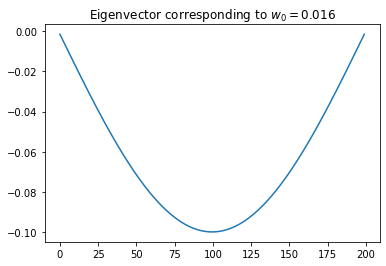

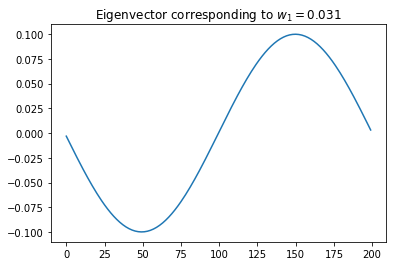

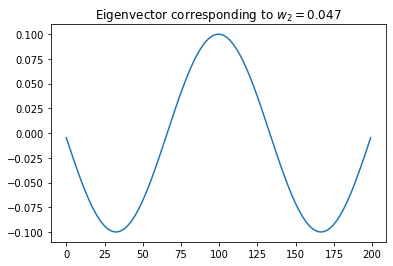

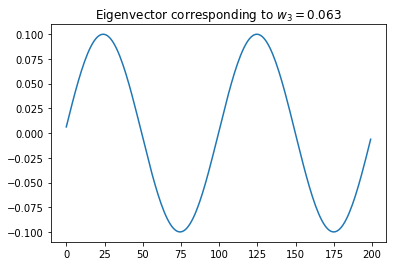

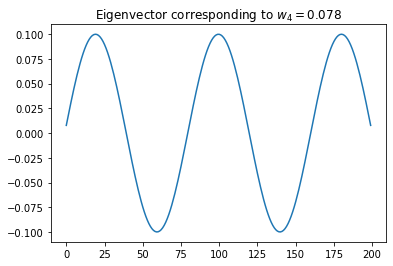

In [8]:
for i,val in enumerate(val1_low5freq):
    plt.figure()
    plt.plot(vec1_low5freq[:, i])
    plt.title('Eigenvector corresponding to $w_{} = {}$'.format(i, np.round(val,3)))

## 1.2) Supported bridge using pillars

For the pillar-supported bridge model, we add extra springs to some of the $N$ masses to help simulate the effect of pillars.


<img src="Pillar.png" width=700></img>

These springs are "grounded" in one end, meaning that the change in length in these springs is solely given by the transverse displacement $y_i$ of each mass $m_i$. Considering that each of these pillars are modeled using springs with stiffness $p_i$, the equation of motion is modified to become:

$$ - \frac{m}{k} w^2 y_i  + (2\,y_i - y_{i+1} - y_{i-1} + \frac{p_i}{k} y_i) = 0 $$

Assume that the stiffness of the support springs are given as:

$p_i = 0.05 k$ if there is a pillar connected to mass $i$ 

$p_i = 0$ otherwise.

The $i$ positions where a mass is connected to a support spring are given in the variable `pillar_positions`:

In [9]:
pillar_positions = np.array([]).astype(int)
l = N//16
for base_idx in [N//4, N//2, 7*N//8]:
    pillar_positions = np.append(pillar_positions, np.arange(base_idx-l//2,base_idx+l//2))
pillar_positions

array([ 44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180])

Construct the matrix ${\bf B}$ for the supported bridge model that solves


$$ \lambda {\bf y} ={\bf B}{\bf y} $$



In [10]:
#grade_clear
Ps = np.zeros(N)
Ps[pillar_positions] = 0.05
B = A + np.diag(Ps)

Find the 5 lowest frequencies $w_i$ and store them in the 1d numpy array `val2_low5freq`. The frequencies should appear in ascending order. Find the corresponding eigenvectors and store them in the 2d numpy array `vec2_low5freq`.

In [11]:
#grade_clear
val2, vec2 = la.eig(B)
ascending_order_2 = np.argsort(val2)
lambdas2 = val2[ascending_order_2[:5]]
val2_low5freq = np.sqrt(lambdas2)
vec2_low5freq = vec2[:, ascending_order_2[:5]]


Plot the eigenvectors corresponding to the lowest frequencies:

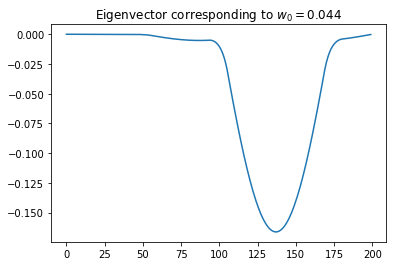

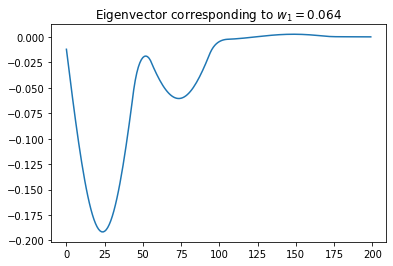

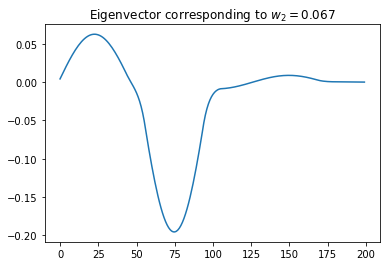

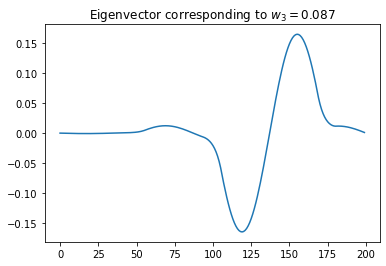

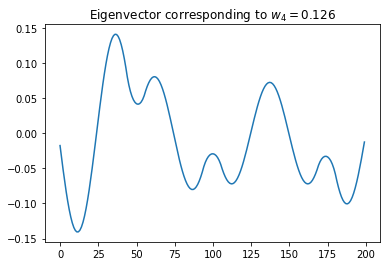

In [12]:
for i,val in enumerate(val2_low5freq):
    plt.figure()
    plt.plot(vec2_low5freq[:, i])
    plt.title('Eigenvector corresponding to $w_{} = {}$'.format(i, np.round(val,3)))

<div class="alert alert-info">
    
<h1>Example 2: Quantuum Chemistry</h1>
    

In this example, we will be solving a generalized eigenvalue problem which has the form
$$
{\bf A x} = \lambda {\bf B x},
$$
where ${\bf A}$ and ${\bf B}$ are a matrices.


This generalized eigenvalue problem arises in computational chemistry, where given a molecule (configuration of atoms), we want to determine the electronic structure so that we can understand the molecular properties.

The electronic structure of a molecule is governed by Schrödinger's equation which is a partial differential equation. After discretizing this equation using the self-consistent field (SCF) method (**also known as the Hartree–Fock method**), we get the following generalized eigenvalue problem:

$$
{\bf F \,C}_i = \lambda_i \,{\bf S\, C}_i \quad \text{(Roothaan's equations)}
$$

In this generalized eigenvalue problem, ${\bf F}$ is called the Fock matrix which holds the electron interactions,
${\bf S}$ is called the overlap matrix which describes how the basis functions used to discretize the problem interact, ${\bf C}$ is a matrix holding the molecular coefficients for the atomic orbitals (here the  eigenvectors are the columns ${\bf C}_i$), and $\lambda_i$ are the molecular energies for each atomic orbital (the corresponding eigenvalues).
    
[Wikipedia reference](https://en.wikipedia.org/wiki/Roothaan_equations#:~:text=The%20Roothaan%20equations%20are%20a,%2C%20respectively%2C%20are%20doubly%20occupied)
    
</div>

<div class="alert alert-warning">    
    
#### One small issue...
    
The Fock matrix ${\bf F}$ depends on the ${\bf C}$ matrix! We have a **"chicken or the egg" paradox**, because we need to have  ${\bf F}$ to obtain ${\bf C}$, but ${\bf C}$ is the solution of the generalized eigenvalue problem. 
    
You just found the first **NONLINEAR** example introduced in this class! To solve nonlinear problems, we will use **iterative methods**.

We will start with an initial guess:

$${\bf C}^{(0)} $$

and then use the iterative scheme (Roothaan's equations):


$$
{\bf F}({\bf C}^{(n)}) \, {\bf C}^{(n+1)}_i = \lambda^{(n+1)}_i \,{\bf S\, C}^{(n+1)}_i 
$$
</div>

where we provide you with a function to evaluate the Fock matrix. 

```python
F = compute_Fock(C)
```

We will assume we are solving a problem where the matrices have shape `(7,7)`. The matrix ${\bf S}$ is given below:

In [13]:
# Initial C matrix
n = 7
S =  np.load('S.npy')

For the first step of your iterative process, obtain the Fock matrix assuming ${\bf C}^{(0)} $ is a zero matrix. Store your result in the variable `F`

In [14]:
#grade_clear
C = np.zeros((n,n))
F = compute_Fock(C)

We will first use the function [scipy.linalg.eigh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html#scipy.linalg.eigh) to obtain the solution of the generalized eigenvalue problem for the first time step

$$
{\bf F}({\bf C}^{(0)}) \, {\bf C}^{(1)}_i = \lambda^{(1)}_i \,{\bf S\, C}^{(1)}_i
$$

Store the eigenvalues $\lambda^{(1)}_i$ in the 1d numpy array `lambn` and the eingenvectors ${\bf C}^{(1)}_i$ in the 2d numpy array `Cn`.

In [15]:
#clear
lambn, Cn = sla.eigh(F,S)

Check the values of the eigenvalues. Note that they are given in ascending order: 

In [16]:
#clear
lambn

array([-32.67455438,  -8.26683464,  -7.6256392 ,  -7.43564273,
        -7.42214005,  -4.19444316,  -4.17940996])

Compute the 2-norm of the eigenvalue array `lambn`. We will use this in order to check convergence of our iterative method. Store this as `ln`.

In [17]:
#grade_clear
ln = la.norm(lambn)
print(ln)

36.5999344131999


Write a code snippet that implement the iterative method proposed above:

- Start from initial guess ${\bf C^{(0)} = 0}$

- Perform the computation below until convergence:

    - Compute the Fock matrix
    - Solve the generalized eigenvalue problem
    - Compute the norm of the eigenvalue array
    - Take the difference between the norm of two consecutive iterations. If the absolute value of this difference is below the tolerance, stop the iterations
    
- Use `tol = 1e-6`

**Define:**
At the end of your iterative method, the code snippet defined in the `#grade` cell below should define:

- The converged matrix ${\bf C}$ stored in the variable `C_converged`

- The converged eigenvector array stored in the variable `lambda_converged`
    

In [20]:
#grade_clear
tol = 1e-6
C = np.zeros((n,n))
ln = 0
for i in range(30):
    F = compute_Fock(C)
    lambn, C = sla.eigh(F,S)
    ln_new = la.norm(lambn)
    if abs(ln_new - ln) < tol:
        break
    ln = ln_new
    
C_converged = C
lambda_converged = lambn

In [21]:
C_converged

array([[-9.94267076e-01, -2.33298503e-01, -1.00619072e-16,
        -1.09155042e-01, -5.38444187e-17,  1.19702336e-01,
        -2.77555756e-16],
       [-2.54859512e-02,  8.45038977e-01,  6.65410342e-16,
         5.60836762e-01,  2.13752356e-16, -7.78170462e-01,
         1.88544901e-15],
       [-1.37609018e-19,  6.07126535e-18, -3.26128013e-16,
        -5.53149188e-16,  1.00000000e+00, -1.70473638e-18,
         1.83880688e-16],
       [-3.02720454e-03,  9.03325833e-02, -4.47407469e-01,
        -5.10383612e-01, -5.80472012e-16, -5.72692316e-01,
         6.52647491e-01],
       [-3.02720454e-03,  9.03325833e-02,  4.47407469e-01,
        -5.10383612e-01, -1.70619334e-16, -5.72692316e-01,
        -6.52647491e-01],
       [ 5.34592937e-03,  1.54212912e-01, -4.53817166e-01,
        -3.09015909e-01,  8.72957435e-18,  7.45857725e-01,
        -8.22064425e-01],
       [ 5.34592937e-03,  1.54212912e-01,  4.53817166e-01,
        -3.09015909e-01, -1.08282355e-17,  7.45857725e-01,
         8.2206442

In [22]:
lambda_converged

array([-20.26205131,  -1.26227562,  -0.56937852,  -0.48077939,
        -0.39749241,   0.58252526,   0.65807393])

<div class="alert alert-warning">   

#### An alternative solution

Suppose you only have available a function that solves the eigenvalue problem

$$
{\bf A x} = \lambda {\bf x},
$$

Transform the original generalized eigenvalue problem 


$$
{\bf F}({\bf C}^{(n)}) \, {\bf C}^{(n+1)}_i = \lambda^{(n+1)}_i \,{\bf S\, C}^{(n+1)}_i 
$$


such that you can solve it using [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh)
    
</div>

We can first diagonalize the matrix ${\bf S}$, such that we write ${\bf S} = {\bf U} {\bf D}{\bf U}^T$. Compute the matrices ${\bf U}$ and ${\bf D}$ and store them in the variables `U` and `D` respectively. Both variables should be 2d numpy arrays.

In [23]:
#grade_clear
d,U = la.eigh(S)
D = np.diag(d)

If your implementation is correct, the expression below should evaluate as `True`

In [24]:
np.allclose(U @ D @U.T , S)

True

Suppose we have a orthogonal matrix ${\bf X}$ such that ${\bf X}{\bf X}^T = {\bf X}^T{\bf X} = {\bf I}$. We can re-write the Roothaan's equations as:


$$
\color{red}{{\bf X}^T}{\bf F}({\bf C}^{(n)}) \,\color{blue}{{\bf X}{\bf X}^T}\, {\bf C}^{(n+1)}_i = \lambda^{(n+1)}_i \,\color{red}{{\bf X}^T}\,{\bf S}\,\color{blue}{{\bf X}{\bf X}^T}\,{ \bf C}^{(n+1)}_i 
$$

If we define the new variables:

$${\bf\bar{c}}_i = {\bf X}^T\, {\bf C}^{(n+1)}_i $$

$${\bf\bar{F}}_i = {\bf X}^T{\bf F}({\bf C}^{(n)}) \,{\bf X}$$

$${\bf\bar{S}}_i = {\bf X}^T{\bf S} \,{\bf X}$$

the Roothaan's equations become:

$$ {\bf\bar{F}}_i {\bf\bar{c}}_i = \lambda^{(n+1)}_i {\bf\bar{S}}_i {\bf\bar{c}}_i $$

If we create the matrix ${\bf X}$ such that:

$${\bf X} = {\bf U}{\bf D}^{-1/2}{\bf U}^T $$

where ${\bf U}$ and ${\bf D}$ come from the diagonalization of ${\bf S}$, one can show that 

$${\bf\bar{S}}_i = {\bf X}^T{\bf S} \,{\bf X} =  {\bf I}$$

<div class="alert alert-warning">

finaly resulting in the alternative iterative scheme:

$$ {\bf\bar{F}}_i {\bf\bar{c}}_i = \lambda^{(n+1)}_i  {\bf\bar{c}}_i $$
    
</div>

Write the function `solve_roothaan` that implements the above iterative method. The function signature is:
    
```python
def solve_roothaan(S,tol):
    # write code
    return C_converged_2, lambda_converged_2
```

The iterative method can be summarized as:

- Compute diagonalization of ${\bf S}$

- Compute the matrix ${\bf X}$

- Start from initial guess ${\bf C^{(0)} = 0}$

- Perform the computation below until convergence:

    - Compute the Fock matrix
    - Compute the modified Fock matrix ${\bf\bar{F}} = {\bf X}^T{\bf F} \,{\bf X}$
    - Solve the eigenvalue problem above using `numpy.linalg.eigh` to obtain the eigenpair $(\lambda^{(n+1)}_i, {\bf\bar{c}}_i)$
    - Evaluate the matrix  ${\bf C}^{(n+1)}$. Make sure you take into account that the matrix ${\bf X}$ is orthogonal, and hence ${\bf X}^{-1} = {\bf X}^T$.
    - Compute the norm of the eigenvalue array
    - Take the difference between the norm of two consecutive iterations. If the absolute value of this difference is below the tolerance, stop the iterations
    
- Use `tol = 1e-6`

- At the end of your iterative method, the function should return:

    - The converged matrix ${\bf C}$ stored in the variable `C_converged_2`

    - The converged eigenvector array stored in the variable `lambda_converged_2`

If you run your function for the matrix $S$ provided in the first approach, you should get the same results. However, make sure you are not hard-coding this information, since the grading function can use different matrices and tolerance values.
    

In [25]:
#grade_clear
def solve_roothaan(S,tol):
     
    C = np.zeros((n,n))
    d,U = la.eigh(S)
    D = np.diag(d)
    X = U @ np.diag(d**(-0.5)) @ U.T
    
    ln = 0
    for i in range(50):
        F = compute_Fock(C)
        Fbar = X.T @ F @ X
        lambn, Cbar = la.eigh(Fbar)
        ln_new = la.norm(lambn)
        if abs(ln_new - ln) < tol:
            break
        ln = ln_new
        C = X@Cbar
    
    C_converged = C
    lambda_converged = lambn

    return C_converged, lambda_converged




In [26]:
C_converged_2, lambda_converged_2 = solve_roothaan(S,1e-6)

In [27]:
C_converged_2

array([[-9.94267080e-01, -2.33298740e-01,  2.91498901e-16,
        -1.09155549e-01,  3.51564477e-17, -1.19701381e-01,
        -4.00158783e-16],
       [-2.54859345e-02,  8.45040286e-01, -1.37824164e-15,
         5.60841447e-01, -1.86156574e-16,  7.78165665e-01,
         2.62858089e-15],
       [ 1.93845341e-17,  2.21540835e-16,  2.80681882e-15,
        -9.22029239e-16, -1.00000000e+00,  2.99227372e-17,
         9.86287365e-17],
       [-3.02720478e-03,  9.03316993e-02, -4.47410885e-01,
        -5.10379100e-01, -3.92996560e-16,  5.72696476e-01,
         6.52645149e-01],
       [-3.02720478e-03,  9.03316993e-02,  4.47410885e-01,
        -5.10379100e-01,  1.48850727e-15,  5.72696476e-01,
        -6.52645149e-01],
       [ 5.34592529e-03,  1.54212114e-01, -4.53812862e-01,
        -3.09022329e-01, -1.17959185e-15, -7.45855230e-01,
        -8.22066800e-01],
       [ 5.34592529e-03,  1.54212114e-01,  4.53812862e-01,
        -3.09022329e-01,  1.36529434e-15, -7.45855230e-01,
         8.2206680

In [28]:
lambda_converged_2

array([-20.26205131,  -1.26227562,  -0.56937852,  -0.48077939,
        -0.39749241,   0.58252526,   0.65807393])